In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import kraken as kr
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc

In [3]:
filenames = ['/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_ImmunePanel.csv',
'/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_KISS and CGA.csv',
'/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_PlacentaPanel.csv']
coord_tables=[]
for file_coordinates in filenames:
    coord_tables.append(pd.read_csv(file_coordinates))
    
adata = sc.read_h5ad('/home/sebastian/data/Placenta_normalized_Seurat_markers.h5ad')

coordinates=pd.concat(coord_tables)

In [4]:
# # coordinates = pd.read_csv('/home/sebastian/data/placenta_rebuttal/data_sample_1/coordinates.csv')

# file_coordinates = 'data/spatial/placenta_overview/10'
# coordinates = pd.read_csv(file_coordinates)
# adata = sc.read_h5ad('/home/sebastian/data/Placenta_normalized_Seurat_markers.h5ad')

In [5]:
# # sample_id = '105'

# # specs for spatial samples ['disease','time','tissue']
# sample_specs = {'102':['C','early','Villi'],
#                 '103':['C','late','Villi'],
#                 '104':['C','late','Villi'],
#                 '105':['D','late','Villi'],
#                 '106':['C','late','Villi'],
#                 '107':['D','late','Villi'],
#                 '156':['C','late','Villi'],}

# # if sample_id in file_coordinates:
# disease=sample_specs[file_coordinates.split('/')[-1][:3]][0]
# time=sample_specs[file_coordinates.split('/')[-1][:3]][1]
# tissue=sample_specs[file_coordinates.split('/')[-1][:3]][2]

    
# adata = adata[((adata.obs['disease']==disease) & 
#          (adata.obs['tissue']==tissue) &
#          (adata.obs['time']==time))]

# # adata.obs['tissue']#.iloc[0]
# # adata.obs['time']

In [6]:
coordinates.gene.replace('HBA1/2','HBA1', inplace=True)
coordinates.gene.replace('KISS','KISS1', inplace=True)



In [7]:
bg = np.zeros((int(coordinates.X.max())+4,int(coordinates.Y.max())+4,))
bg[np.array(coordinates.X).astype(int),np.array(coordinates.Y).astype(int)]=1
bg[np.array(coordinates.X).astype(int)+1,np.array(coordinates.Y).astype(int)]=1
bg[np.array(coordinates.X).astype(int),np.array(coordinates.Y).astype(int)+1]=1
bg[np.array(coordinates.X).astype(int)+1,np.array(coordinates.Y).astype(int)+1]=1


In [8]:
from skimage.filters import gaussian

bg = gaussian(bg,sigma=15)

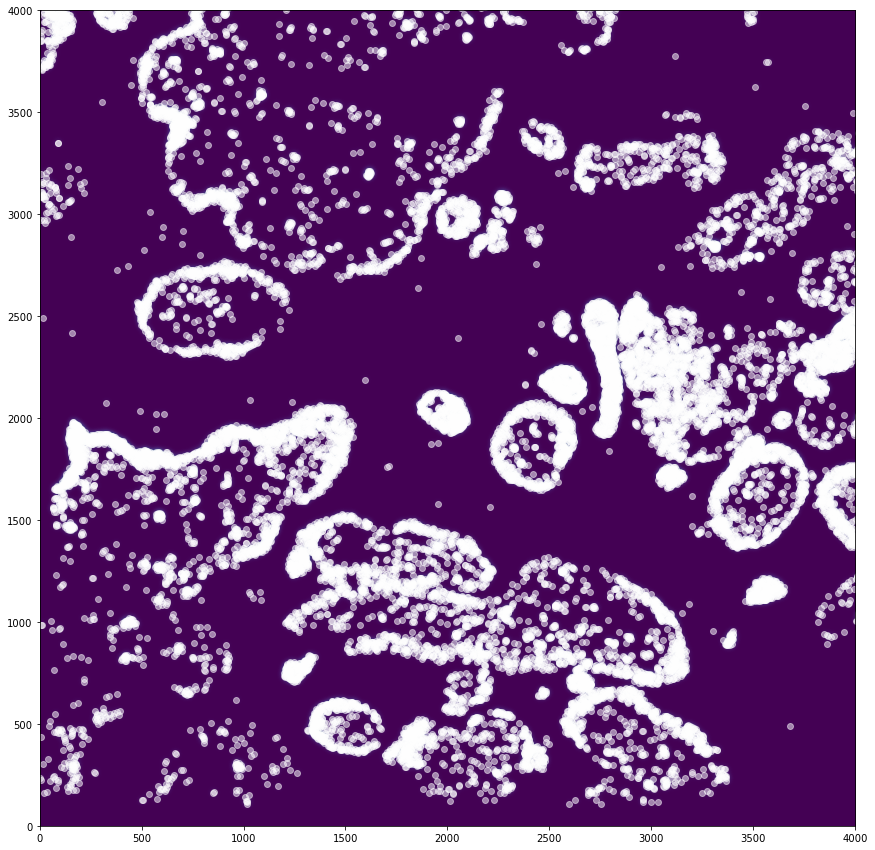

In [9]:
plt.figure(figsize=(15,15))
plt.scatter(coordinates.X,coordinates.Y,c='w',alpha=0.5)
plt.xlim(0,4000)
plt.ylim(0,4000)
plt.imshow(bg.T)


In [10]:
bgmap = kr.PixelMap(bg[::5,::5].T,upscale=0.2)

In [11]:
# subset_mask = ((coordinates.X>500 ) &
#                 (coordinates.X<5000 ) &
#                 (coordinates.Y>2200 ) &
#                 (coordinates.Y<4900 ))
subset_mask = slice(0,-1,None)

# spatial = kr.SpatialData(coordinates.gene, coordinates.X, coordinates.Y)
spatial = kr.SpatialData(coordinates.gene[subset_mask], 
                         coordinates.X[subset_mask], 
                         coordinates.Y[subset_mask],
                        pixel_maps=[bgmap])

#)gene_tag='gene')
# sc = kr.ScData(adata)
# asdf

<Figure size 720x720 with 0 Axes>

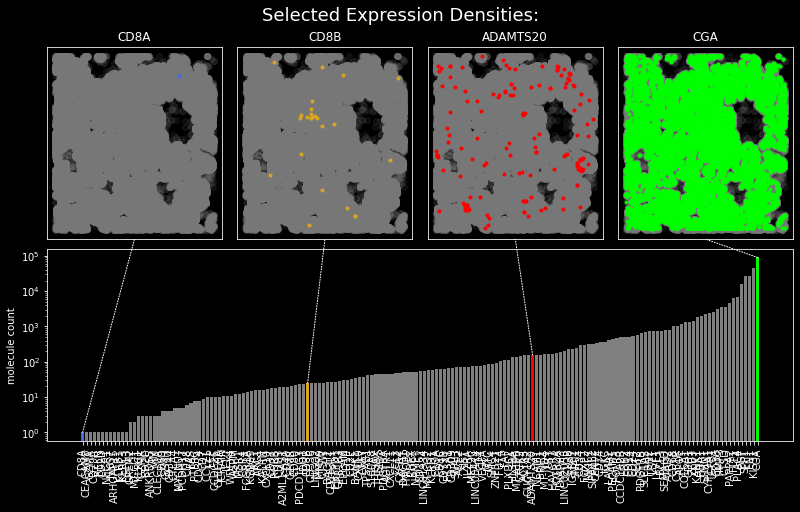

In [12]:
plt.figure(figsize=(10,10))

spatial.plot_overview()


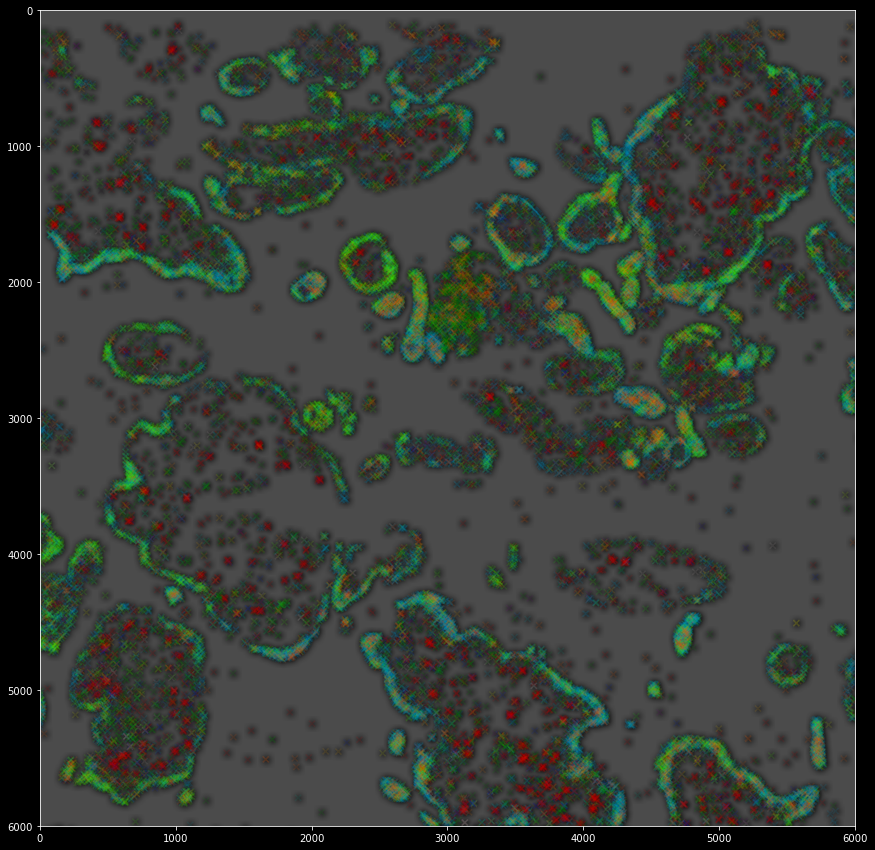

In [13]:
plt.figure(figsize=(15,15))
spatial.spatial[0:6000,0:6000].scatter(marker='x',alpha=0.1)


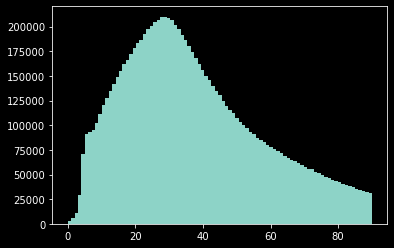

In [14]:
spatial.plot_radial_distribution(n_neighbors=40, bins=np.linspace(0,90,90))

In [15]:
spatial.gene_annotations

0           CD1C
1           ZEB3
2         FCGR2A
3          STMN1
4          TGFB1
           ...  
109065      SPP1
109066    DIAPH3
109067      HBA1
109068    DIAPH3
109069    PAPPA2
Name: gene_annotations, Length: 268009, dtype: object

In [16]:
# spatial = kr.SpatialData(coordinates,gene_tag='gene')
# sc = kr.ScData(coordinates.iloc[:])

adata,spatial=kr.synchronize(adata,spatial,10,10)

Removing CTSD, which is not present in SC data
Removing HAVCR3, which is not present in SC data
Removing FUT4, which is not present in SC data
Removing CD2G, which is not present in SC data
Removing CD2D, which is not present in SC data
Removing ZEB3, which is not present in SC data
Removing CD344, which is not present in SC data
Removing KLRC3, which is not present in SC data
Removing CD309, which is not present in SC data
Removing ACTA3, which is not present in SC data
Removing PDCD1LG3, which is not present in SC data
Removing CD162, which is not present in SC data
Removing CD336, which is not present in SC data
Removing CD374, which is not present in SC data
Removing CD2E, which is not present in SC data
A2ML1-AS1
ACE2
ADAMTS20
AGTR1
ANKRD55
Removing ANKRD55, low count in spatial data
APOE
ARG1
ARHGAP15
Removing ARHGAP15, low count in spatial data
ASPM
ATAD2
BACH2
BANK1
BCL3
BRIP1
C1QA
C1QB
CCDC102B
CCDC26
CCL21
CCL3
CCR4
CD14
CD163L1
CD19
CD1C
CD24
CD34
CD36
CD37
CD38
Removing CD3

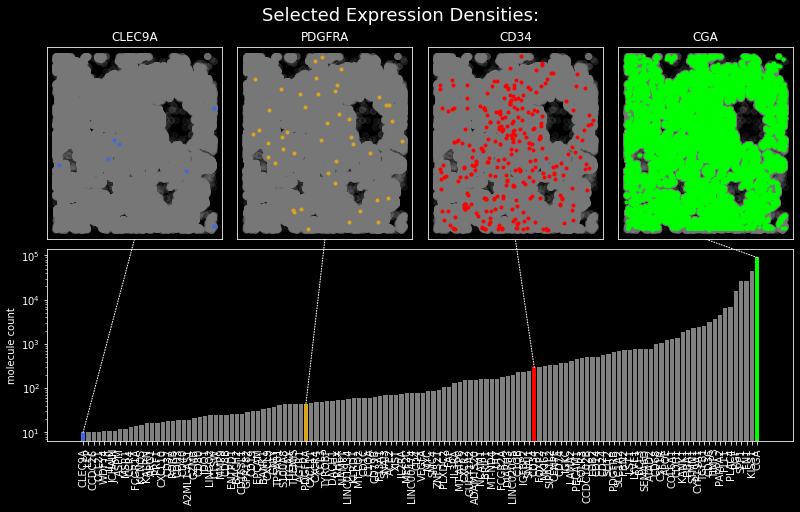

In [17]:
# plt.figure(figsize=(15,10))

# kr.compare_counts(sc,spatial)
spatial.plot_overview()
# spatial.plot_bars()

In [19]:
plt.figure(figsize=(10,10))
list(spatial.gene_classes)

['A2ML1-AS1',
 'ACE2',
 'ADAMTS20',
 'AGTR1',
 'APOE',
 'ARG1',
 'ASPM',
 'ATAD2',
 'BACH2',
 'BANK1',
 'BCL3',
 'BRIP1',
 'C1QA',
 'C1QB',
 'CCDC102B',
 'CCDC26',
 'CCL21',
 'CCL3',
 'CCR4',
 'CD14',
 'CD163L1',
 'CD19',
 'CD1C',
 'CD24',
 'CD34',
 'CD36',
 'CD37',
 'CD4',
 'CD40',
 'CD68',
 'CD74',
 'CD79B',
 'CD80',
 'CD8B',
 'CDH1',
 'CDH3',
 'CENPE',
 'CGA',
 'CLEC9A',
 'COL6A1',
 'CSF1R',
 'CTSW',
 'CXCL10',
 'CXCL11',
 'CXCL9',
 'CXCR2',
 'CXCR4',
 'CYP19A1',
 'DACH1',
 'DIAPH3',
 'ENTPD1',
 'EPCAM',
 'F13A1',
 'FAP',
 'FBN2',
 'FCGR1A',
 'FCGR2A',
 'FLT1',
 'FN1',
 'FOLR3',
 'FOXP2',
 'GNLY',
 'GPR182',
 'GUCY1A2',
 'GZMB',
 'HBA1',
 'IDO1',
 'IGFBP2',
 'IGKC',
 'IL10',
 'IL2RA',
 'IL3RA',
 'ITGAX',
 'JCHAIN',
 'KALRN',
 'KANK1',
 'KCNQ5',
 'KISS1',
 'KLRD1',
 'LAMA2',
 'LDB2',
 'LEP',
 'LINC00474',
 'LINC01934',
 'LINC02055',
 'LINGO2',
 'LST1',
 'LYVE1',
 'MEF2C',
 'MKI67',
 'MMP9',
 'MSR1',
 'MT-ATP6',
 'MT-CO2',
 'MT-ND4',
 'MYC',
 'NAMPT',
 'NCAM1',
 'PAPPA2',
 'PDGFRA',
 

<Figure size 720x720 with 0 Axes>

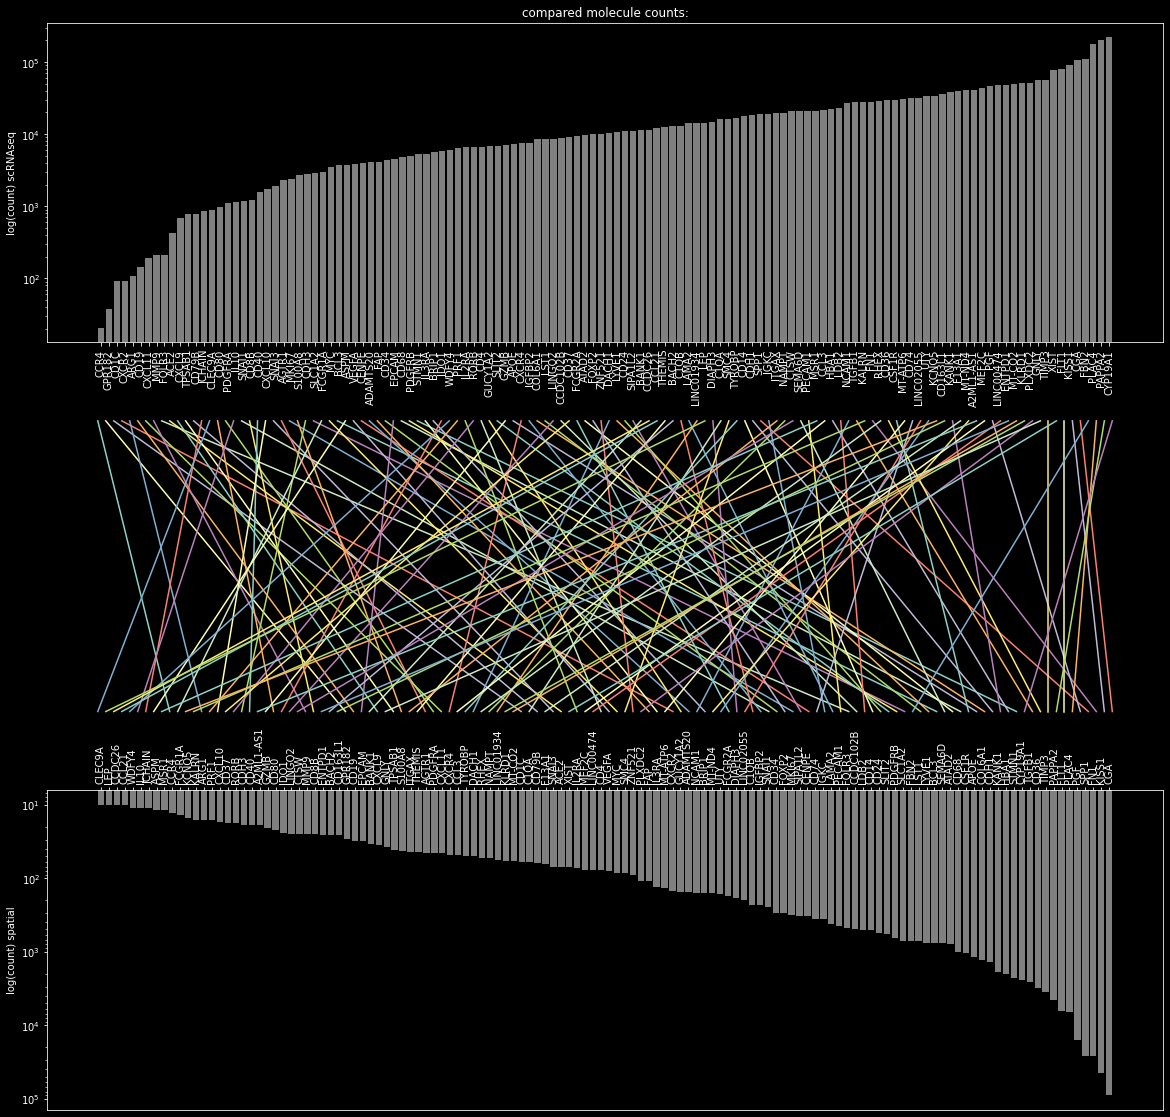

In [21]:
plt.figure(figsize=(20,20))
kr.compare_counts(adata,spatial)

In [ ]:
assert False

In [23]:
spatial = spatial.spatial[:3000,:3000]
#kr.SpatialData(coordinates.gene[subset_mask], coordinates.X[subset_mask], coordinates.Y[subset_mask])#)gene_tag='gene')


In [49]:
# H = np.array(-count_matrix.multiply(count_matrix_log.todense()).sum(1)).flatten()


In [25]:
Dkl = spatial.knn_clean(n_neighbors=20)

In [48]:
# plt.figure(figsize=(14,14))

# plt.scatter(spatial.X,spatial.Y,c=spatial.gene_ids,cmap='nipy_spectral',s=np.array(-H_.sum(1)).flatten()**2)#c=H)
# plt.colorbar()

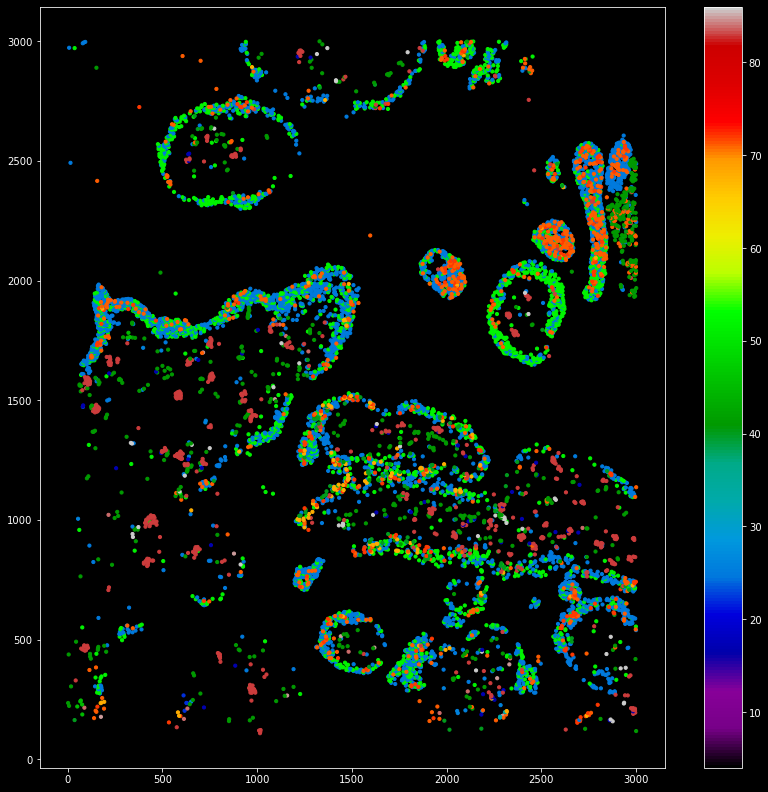

In [33]:
plt.figure(figsize=(14,14))

mask = Dkl<(Dkl.mean()*3.5)
plt.scatter(spatial.X[mask],spatial.Y[mask],c=spatial.gene_ids[mask],cmap='nipy_spectral',
            s=10)
plt.colorbar()

In [43]:
spatial.stats

,counts,count_ranks,count_indices,gene_ids
A2ML1-AS1,1,0,0,0
ACE2,4,36,90,1
ADAMTS20,4,37,80,2
AGTR1,2,26,74,3
APOE,29,74,64,4
...,...,...,...,...
TYROBP,2,23,41,88
UTY,7,44,71,89
VEGFA,1,1,83,90
XIST,3,32,52,91


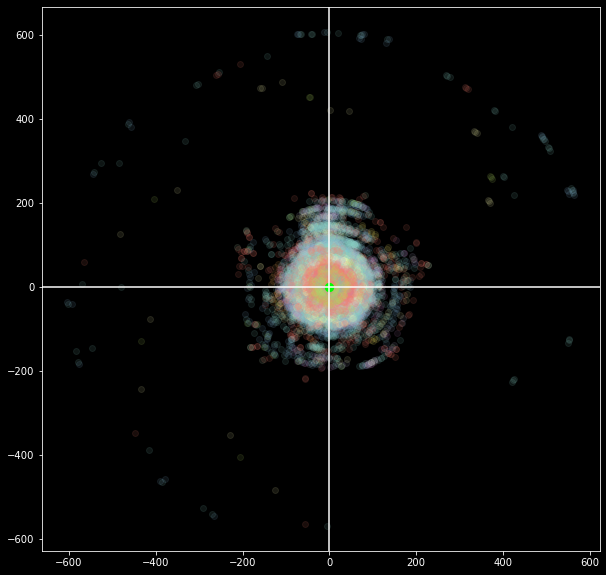

In [44]:
plt.figure(figsize=(10,10))
out = spatial.spatial_decomposition(('KISS1',),)

In [45]:
from sklearn.decomposition import NMF as NMF

nmf = NMF(n_components=5, alpha_H=0.1,  l1_ratio=0.1)
facs = nmf.fit_transform(out.reshape((-1,out.shape[-1])))

/home/sebastian/anaconda3/envs/spaceQC/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/home/sebastian/anaconda3/envs/spaceQC/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


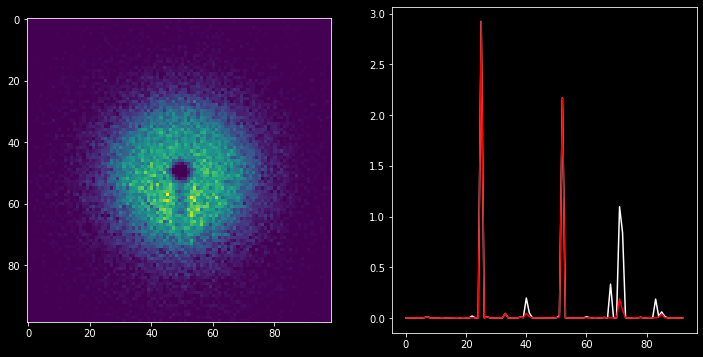

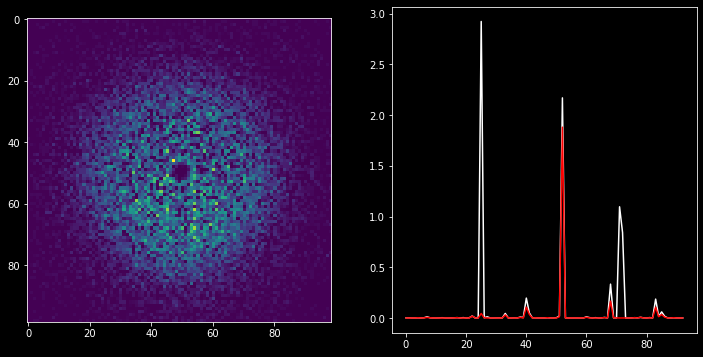

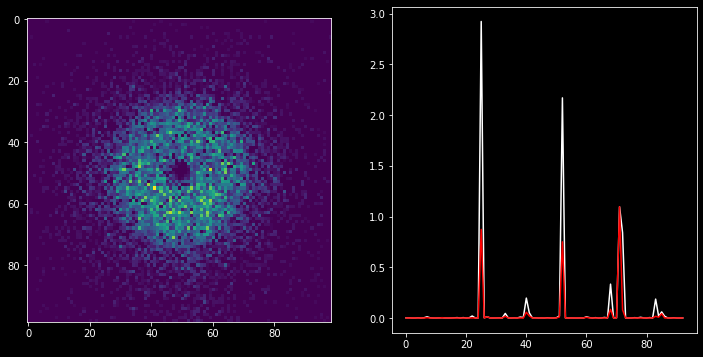

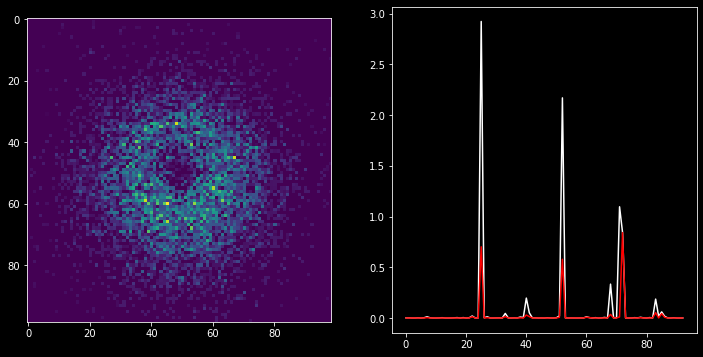

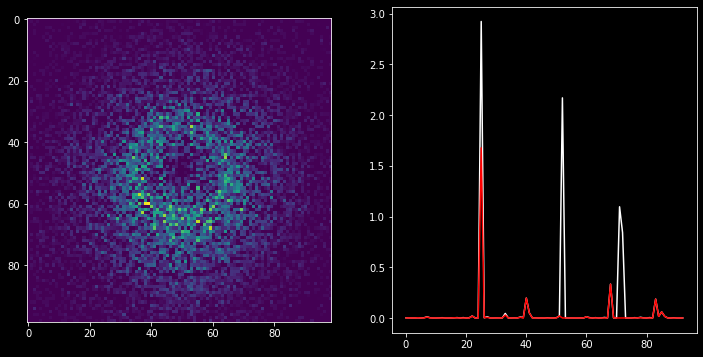

In [46]:
for i in range(5):
    plt.figure(figsize=(12,6))
    
    plt.subplot(121)
    plt.imshow(facs[:,i].reshape((out.shape[:-1])))
    
    plt.subplot(122)
    
    plt.plot(nmf.components_.max(0),color='w')
    plt.plot(nmf.components_[i], color='r')
    

In [ ]:
coordinates_cortex = pd.read_csv('/home/sebastian/data/ssamLiteDataFinal/CodeluppiosmFISH/coordinates.csv')

mask = (coordinates_cortex.X>1200)&(coordinates_cortex.Y<1000)
spatial_cortex = kr.SpatialData(coordinates_cortex.genes[mask], coordinates_cortex.X[mask], coordinates_cortex.Y[mask])#)gene_tag='gene')

# adata_cortex=sc.read_h5ad("data/adata_processed_sc.h5ad")

In [ ]:
spatial_cortex.plot_entropy()

In [ ]:
Dkl = spatial_cortex.knn_clean(n_neighbors=20)

In [ ]:
Dkl

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(121)
plt.scatter(spatial_cortex.X,spatial_cortex.Y,c=spatial_cortex.gene_ids,s=1/(0.01+Dkl**2), cmap='nipy_spectral')

# plt.xlim((1500,1700))
# plt.ylim((300,500))


plt.subplot(122)
plt.scatter(spatial_cortex.X,spatial_cortex.Y,c=spatial_cortex.gene_ids,s=(0.01+Dkl**3), cmap='nipy_spectral')

plt.xlim((1500,1700))
plt.ylim((300,500))

In [ ]:
out = spatial_cortex.spatial_decomposition(('Acta2',))

In [ ]:
plt.figure(figsize=(15,25))
spatial.scatter('KISS1',marker='.')

In [ ]:
mus = np.array([14,17,20,40,42,80])
sigmas=[1,2]
thresholds=[0.2,0.15]

def normal_pdf(mu,sigma):
    return( 1/(sigma**2*2*np.pi)**0.5 * np.exp(-(mu**2)/(2*sigma**2))  )

x = np.linspace(0,100,500)

for i in range(len(thresholds)):
    threshold=thresholds[i]
    sigma=sigmas[i]

    y = np.zeros_like(x)

    for mu in mus:
        y+=normal_pdf(x-mu,sigma)
        
    plt.figure()

    plt.vlines([mus],0,0.3,colors='k', alpha=0.2)  
    plt.hlines(threshold,x.min(),x.max(),colors='k')  

    filtered = np.ones_like(x)*threshold
    filtered[y<=threshold]=np.nan

    plt.plot(x,y)

    plt.plot(x,filtered,c='r',linewidth=6)

    plt.title(f'sigma:{sigma} - threshold:{threshold}')

In [ ]:
mus = np.array([[14,20,40,42,79],
                [24,33,60,80,81]]).T
# sigma=4
thresholds=[0.09,0.06,0]

clrs = ['k','royalblue','red']

def normal_pdf(mu,sigma):
    return( 1/(sigma**2*2*np.pi)**0.5 * np.exp(-(mu**2)/(2*sigma**2))  )

x = np.linspace(0,100,500)
x=np.vstack((x,x))
for i in range(len(thresholds)):
    threshold=thresholds[i]

    y = np.zeros_like(x)

    for mu in mus:
        y+=normal_pdf(x-mu[:,None],sigma)
        
    plt.figure()

    plt.vlines([mus],0,0.3,colors='k', alpha=0.1)  
    plt.hlines(threshold,x.min(),x.max(),colors='k')  

    c = np.array([y_.argmax()+1 if y_.max()>threshold else 0 for y_ in y.T])

    for j in range(len(clrs)):
        filtered = np.ones_like(x[0])*threshold

        filtered[c!=j]=np.nan
        if j==0: lw=3 
        else:lw=7
        plt.plot(x[0],filtered,c=clrs[j],linewidth=lw)

    for j in range(x.shape[0]):
        plt.plot(x[j],y[j],c=clrs[j+1], alpha=0.3)
    plt.title(f'sigma:{sigma} - threshold:{threshold}')
    

    

Dear ladies and gentlemen,
thank you very much for your response. We very much appreciate the thorough revision of your publishing material.
You discovered repetetive patterns throughout a number of subfigures in the supplementary Figure [1] of our proposed article 'SSAM-lite: a light-weight web app for rapid analysis of spatially resolved transcriptomics data'. The figure illustrates the effect of different parameter combinations on the behavior of our algorithm by repeatedly evaluating the same input sample at different parameter settings. 

In this case, we would like to stress that pattern repetition throughout different analysis rounds of identical input data is to be expected in some cases. Given the nature of our method (a KDE with a subsequent application of an argmax function and a threshold-based filter), repetitive patterns can arise from two main effects:

1) Identical argmax output when KDE parameters are fixed.
The output of the underlying KDE function remains the same when the 'bandwidth/sigma' parameter is fixed. On the vertical axis, the subfigures display the effecst of the threshold parameter only, with a fixed KDE bandwidth parameter. This means that, from top to bottom, the modeled extracellular (black) surface is retracting, wheras patterns in the discovered tissue composition remains stable (as the argmax of an identical KDE). This largely explains the repetitive patterns in some of the two rightmost (large-bandwidth) columns of our figure. We kindly refer you to attachment 1 for a graphical illustration of the effect in a one-dimensional environment.

2) Similar outputs of different sigma/threshold parameter combinations.
Our KDE implemetation makes use of a Gaussian kernel. The bandwidth/sigma parameter determines the width and height of the kernel function. With a growing sigma parameter, the width of the kernel increases and the height of the kernel decreases. When the threshold parameter is changed in the opposite direction of sigma, a decrease in kernel height can be cancelled out through a lower filtering step. In this case, the algorithm output after filtering can be expected to look very similar - especially in the case of a sparse overall pattern. This effect can explain the repetitive patterning that occurs in some of the two leftmost (low-bandwidth) subfigures. Please look at attachment 2 for a graphical illustration of the effect in a one-dimensional environment.




In [ ]:
# coordinates_cortex.loc[coordinates_cortex.genes=='Lamp5','X']+=np.random.normal(size=((coordinates_cortex.genes=='Lamp5').sum(),))*20
# coordinates_cortex.loc[coordinates_cortex.genes=='Lamp5','Y']+=np.random.normal(size=((coordinates_cortex.genes=='Lamp5').sum(),))*20
# spatial_cortex = kr.SpatialData(coordinates_cortex.genes, coordinates_cortex.X, coordinates_cortex.Y)#)gene_tag='gene')


In [ ]:
coordinates.loc[coordinates.gene=='KISS1','X']+=np.random.normal(size=((coordinates.gene=='KISS1').sum(),))*20
coordinates.loc[coordinates.gene=='KISS1','Y']+=np.random.normal(size=((coordinates.gene=='KISS1').sum(),))*20
spatial = kr.SpatialData(coordinates.gene, coordinates.X, coordinates.Y)#)gene_tag='gene')


In [ ]:
plt.figure(figsize=(15,25))
spatial_cortex.scatter('Lamp5',marker='.')

In [ ]:
# spatial_cortex = kr.SpatialData(coordinates_cortex.genes, coordinates_cortex.X, coordinates_cortex.Y)#)gene_tag='gene')
spatial.plot_entropy()

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=12)

coords = np.stack([spatial.data.X, spatial.data.Y]).T
knn.fit(coords)
distances, indices = knn.kneighbors(coords)

knn_cells = np.zeros_like(indices)
for i in range(indices.shape[1]):
    knn_cells[:, i] = spatial.data['gene_id'].iloc[indices[:, i]]


In [ ]:
plt.figure(figsize=(8,25))

H = []

for i in range(spatial.data['gene_id'].max()+1):
    x = knn_cells[spatial.data.gene_id==i]

    _, n_x = np.unique(x[:,1:], return_counts=True)
        
    p_x = n_x/(n_x.sum())
    print(spatial.gene_classes[i], p_x.max())
    
    h_i = -(p_x*np.log2(p_x)).sum()
    H.append(h_i)
    plt.plot((p_x)+i/2)
    plt.plot(np.zeros_like(p_x)+i/2,c='grey')
    
# plt.bar(np.arange(len(H)),H)    
# plt.yticks(np.arange(len(H))/2,spatial_cortex.gene_classes, rotation=90)
plt.yticks(np.arange(len(H))/2,spatial.gene_classes, rotation=0)

plt.show()
# plt.yscale('log')

In [ ]:
p_x

In [ ]:
spatial_cortex.plot_overview()

In [ ]:
(adata_cortex,spatial_cortex) = kr.synchronize(adata_cortex,spatial_cortex,0,0)

In [ ]:
plt.figure(figsize=(10,10))
kr.compare_counts(adata_cortex,spatial_cortex)

In [ ]:
fig = plt.figure(figsize=(7,7))

ax = fig.subplots(1)

ax.plot(np.random.normal(size=(30,)))
# plt.xticks(np.arange(30),np.arange(30))

print("Dot per inch(DPI) for the figure is: ", fig.dpi)
bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height
print("Axis sizes are(in pixels):", width, height)


In [ ]:
import scvi


adata_spatial = scvi.data.smfish(save_path='data/')

In [ ]:
adata_spatial_anterior = scpy.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Anterior"
)

In [ ]:
scpy.pl.spatial(adata_spatial_anterior)

In [ ]:
adata_spatial_anterior.uns['spatial'].keys()

In [ ]:
import scipy
import sys

In [ ]:
                      
X = scipy.sparse.csr_matrix((np.ones((coordinates.shape[0],)),
                             (np.arange(coordinates.shape[0]),
                                          coordinates.gene.apply(lambda x: newobj.var.index.get_loc(x)))),
                           shape=(coordinates.shape[0], len(adata.var)))
                              
# for i,c in coordinates.iterrows():
#     newobj.X[i,newobj.var.index==c.gene]=1
newobj = scpy.AnnData(X, var=adata.var)
    
newobj.obsm['spatial']  = np.array(coordinates[['X','Y']])
# newobj.obsm['Y']  = np.array(coordinates['Y'])

In [ ]:
                          
scpy.pl.spatial(newobj, spot_size=0.5)

In [ ]:
# newobj.obsm['spatial']
adata_spatial_anterior.uns['spatial']

In [ ]:
import squidpy as sq
adata_squid= sq.datasets.slideseqv2()

In [ ]:
scpy.pl.spatial(adata_squid, color="cluster", spot_size=10)

In [ ]:
adata_squid.shape

In [ ]:
plt.imshow(np.linspace)